In [17]:
##import dependencies## 

#plotting#
import matplotlib.pyplot as plt
from matplotlib import figure

#TDA#
import gudhi

#file reading#
import laspy as lp #specifically for .las and .laz files. Currently don't have a way to read in .e57 files
import os
import glob 

#other#
import numpy as np
import time

In [18]:
#set directory to wherever you have your data stored
os.chdir("/Users/oliviachandrasekhar/Desktop/s21_internship/data/tls_data/thinned_all")
#create a list of everything in the directory of a certain file type
list = glob.glob('*.las') #change to .laz for plot clips or .las for full tile or BLK scans
#sort the list
list = sorted(list)
#check that you loaded it all
len(list)

44

In [20]:
num_tiles=len(list)
tiles= []

#for loop to read in data, convert to np arrays--needed for TDA algorithms#
for i in range(num_tiles):
    file=lp.file.File(list[i], mode="r")
    file_array=np.array((file.x, file.y, file.z)).transpose()
    tiles.append(file_array)

There are 34530 vertices
There are 973703 simplices
My program took 11.166002035140991 seconds to run


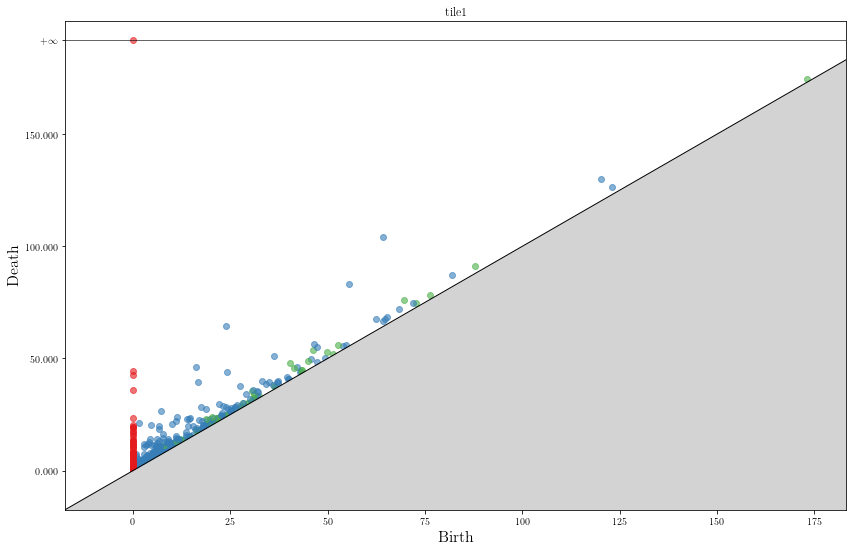

In [21]:
#process all tiles, save persistance diagrams
#keeping track of time to see how long our program takes to run. Can also use other progress-capture metrics

start_time=time.time() 
for i in range(1): #use index num_tiles to run through all of them
    tile=tiles[i] #run through the list
    alpha_complex = gudhi.AlphaComplex(tile) #create the alpha complex--triangulates the data, basically
    simplex_tree = alpha_complex.create_simplex_tree() #constructs simplicial complex. can set max_alpha_square--default is infinity
    
    #can report the number of vertices and faces in the simplicial complex
    v=simplex_tree.num_vertices()
    f=simplex_tree.num_simplices()
    
    print("There are", v, "vertices")
    print("There are", f, "simplices")
    
    #generates and plot persistance diagrams
    diag = simplex_tree.persistence() 
    gudhi.plot_persistence_diagram(diag)
    plt.rcParams["figure.figsize"] = (14,9)
    plt.title("tile"+str(i+1))
    
    #save the figure to file if you want
    #plt.savefig("/Users/oliviachandrasekhar/Desktop/s21_internship/Output/tls_pd/t_1_3/tile"+str(i+1)+".png") #save to file if you want
    
    #close figures if you're generating a bunch or you'll override memory 
    #plt.close()
print("My program took", (time.time() - start_time), "seconds to run")

In [22]:
##for loop to get betti numbers for different alphas##
alpha=[ ]
betti0=[ ]
betti1=[ ]
betti2=[ ]
for i in range(5,51,5): #these are the alpha values we'll run through--currently 5 through 50 with step size 5
    alpha_complex = gudhi.AlphaComplex(tile)
    simplex_tree = alpha_complex.create_simplex_tree(i)
    diag = simplex_tree.persistence()
    betti=simplex_tree.betti_numbers()
    alpha.append(i)
    b0=betti[0]
    b1=betti[1]
    b2=betti[2]
    betti0.append(b0)
    betti1.append(b1)
    betti2.append(b2)  
    print("done with alpha", i)

done with alpha 5
done with alpha 10
done with alpha 15
done with alpha 20
done with alpha 25
done with alpha 30
done with alpha 35
done with alpha 40
done with alpha 45
done with alpha 50


<function matplotlib.pyplot.show(*args, **kw)>

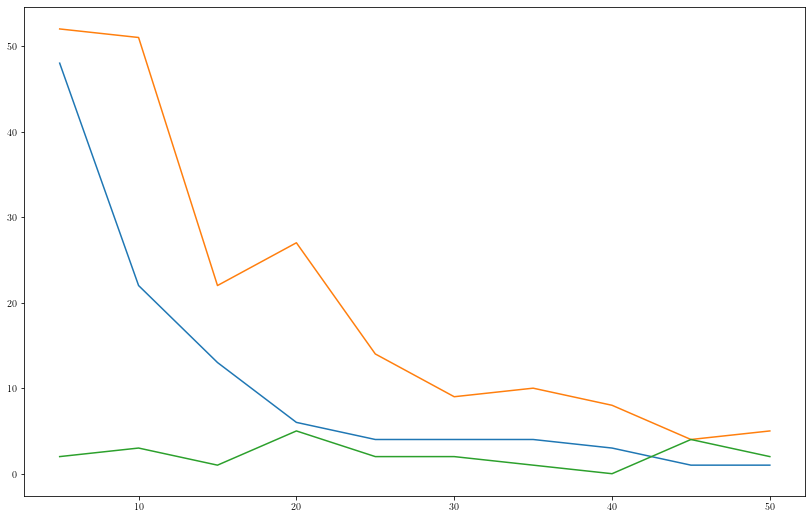

In [15]:
#plot betti numbers as a function of alpha
plt.plot(alpha, betti0)
plt.plot(alpha, betti1)
plt.plot(alpha, betti2)
plt.show

In [16]:
#loop through all plots, calculate betti numbers for alpha values for each, save it all in a .csv file
#can ammend this in various ways
start_time=time.time()
header = ['tile', 'alpha', 'b0', 'b1',  'b2']
with open('/Users/oliviachandrasekhar/Desktop/betti_als_3.csv', 'a', newline='') as f: #make sure you have a blank csv file in this place
        writer = csv.writer(f)
        writer.writerow(header)
        for i in range(num_tiles):
            tile=tiles[i]
            alpha_complex = gudhi.AlphaComplex(tile)
            for j in range(50,101,5):
                simplex_tree = alpha_complex.create_simplex_tree(j)
                diag = simplex_tree.persistence()
                betti=simplex_tree.betti_numbers()
                b0=betti[0]
                b1=betti[1]
                b2=betti[2]
                data=[i,j,b0,b1,b2]
                writer.writerow(data)
                print(i,j)
print("My program took", (time.time() - start_time), "seconds to process", num_tiles, "files") 

NameError: name 'nonsense' is not defined